<a href="https://colab.research.google.com/github/mahatrabelsi1/HandwritingDetection/blob/main/HandwritingDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install Matplotlib

In [ ]:
import matplotlib as mp
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Step 1: Load the data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Step 2: Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# Step 3: Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)  # 10 classes (digits 0-9)
test_labels = to_categorical(test_labels, 10)

# Now proceed with model initialization, compilation, and training...
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Step 4: Initialize the model
model = Sequential()

# Add layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(train_images, train_labels, epochs=3, batch_size=64, validation_split=0.2)


Epoch 1/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.8140 - loss: 0.5806 - val_accuracy: 0.9803 - val_loss: 0.0674
Epoch 2/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 76ms/step - accuracy: 0.9683 - loss: 0.1018 - val_accuracy: 0.9852 - val_loss: 0.0509
Epoch 3/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 70ms/step - accuracy: 0.9774 - loss: 0.0743 - val_accuracy: 0.9886 - val_loss: 0.0418


In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9865 - loss: 0.0418
Test accuracy: 0.9884999990463257


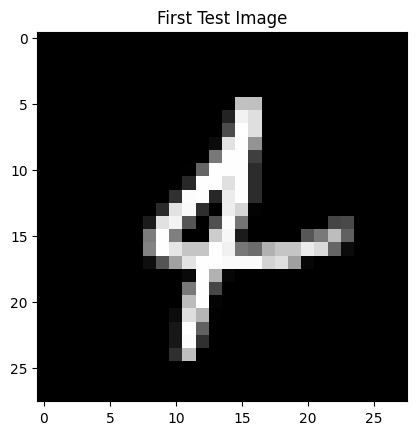

In [ ]:
import matplotlib.pyplot as plt

# Assume test_images is already loaded and preprocessed (normalized and reshaped)
# Display the first test image
plt.imshow(test_images[300].reshape(28, 28), cmap='gray')
plt.title('First Test Image')
plt.show()


In [ ]:
# Make predictions
predictions = model.predict(test_images)

# Example: Get the predicted class for the first test image
predicted_class = predictions[300].argmax()
print(f"Predicted class: {predicted_class}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
Predicted class: 4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


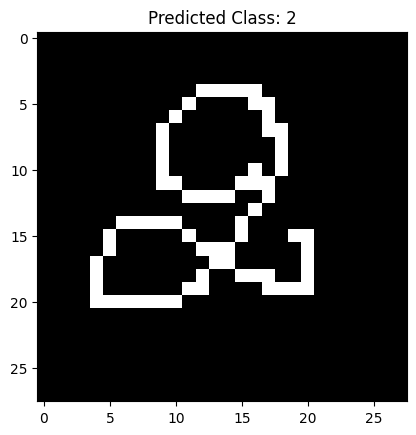

Model prediction: 2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing import image

def preprocess_image(img_path):
    """
    Preprocess the uploaded image to match the input format for the model.
    """
    # Load the image
    img = Image.open(img_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels

    # Convert to a numpy array
    img_array = np.array(img)

    # Normalize the pixel values (0 to 1)
    img_array = img_array.astype('float32') / 255.0

    # Reshape to match the model's input shape (28, 28, 1)
    img_array = img_array.reshape(1, 28, 28, 1)

    return img_array

def predict_uploaded_image(img_path):
    """
    Predict the digit from an uploaded image.
    """
    # Preprocess the image
    processed_image = preprocess_image(img_path)

    # Make a prediction
    prediction = model.predict(processed_image)

    # Get the predicted class (digit)
    predicted_class = np.argmax(prediction)

    # Show the uploaded image
    plt.imshow(Image.open(img_path), cmap='gray')
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()

    return predicted_class

# Example usage: Add the path to the image you want to predict
img_path = '/content/drive/MyDrive/mini project/pixilart-drawing.png'  # Replace with the actual image path
predicted_class = predict_uploaded_image(img_path)
print(f"Model prediction: {predicted_class}")
